Attribution 4.0 International (CC BY 4.0)

https://creativecommons.org/licenses/by/4.0/

Smart_9_raw is power-on hours

https://en.wikipedia.org/wiki/S.M.A.R.T.#Known_ATA_S.M.A.R.T._attributes

In [1]:
import pandas
print('pandas',pandas.__version__)
import glob
import pickle
import numpy
import time
import random
import matplotlib.pyplot as plt

pandas 0.23.4


data from Backblaze

In [2]:
df_header_only=pandas.read_csv('zipped_data/data_Q2_2018.zip_folder/2018-04-01.csv',nrows=3)
#df_header_only.head()

In [3]:
df = pandas.read_csv('data_synthesized_from_csvs/all_failures_smart_columns1to31.log',header=None)
df.columns=df_header_only.columns[0:31]
df.shape

(8743, 31)

Extrapolating failure rates from Backblaze has a few assumptions:
* drive technology is heterogeneous in the BackBlaze data set
* drive vendor/model/batch is heterogeneous in the BackBlaze data set
* does not account for time drive exists prior to production use
* read/write pattern is specific to BackBlaze
* read/write throughput per year is specific to BackBlaze

Given those caveats, we'll use the Backblaze failures as a sampling distribution

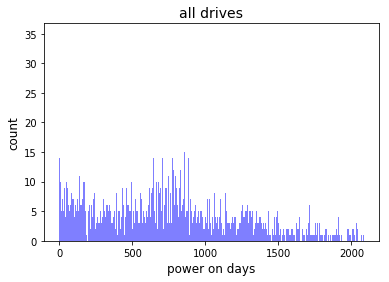

In [4]:
max_hours=50000
max_days=max_hours//24
number_drives_failed_that_day, day_index, patches = plt.hist(df[df['smart_9_raw'] < max_hours]['smart_9_raw'].dropna(how='any')/24, 
                            bins=max_days, 
                            facecolor='blue', 
                            alpha=0.5)
plt.xlabel('power on days',fontsize=12)
plt.ylabel('count',fontsize=12);
plt.title('all drives',fontsize=14);

In [5]:

def create_ary(number_of_drives,lifespan_in_days):
    ary = numpy.empty([number_of_drives,lifespan_in_days])
    ary[:] = -1

    start_time=time.time()
    # initial lifespan
    for drive_indx in range(number_of_drives):
        ary[drive_indx,0]=1 # every drive exists on day 1
        # https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.choice.html
        drive_lifespan_in_days = int(numpy.random.choice(day_index[:-1],p=number_drives_failed_that_day/sum(number_drives_failed_that_day)))
#        print(drive_lifespan_in_days)
#        print('drive lifespan:',drive_lifespan_in_days)
        ary[drive_indx,0:drive_lifespan_in_days]=1
#        print(ary[drive_indx,:])
    for drive_indx in range(number_of_drives):
        for day_indx in range(lifespan_in_days):
            while ary[drive_indx,day_indx]<0:
                drive_lifespan_in_days = int(numpy.random.choice(day_index[:-1],p=number_drives_failed_that_day/sum(number_drives_failed_that_day)))
                #print(drive_lifespan_in_days)
                #print('drive:',drive_indx)
                #print('day indx:',day_indx)
                #print('end = ',min([day_indx+drive_lifespan_in_days,lifespan_in_days]))
                #print(ary[drive_indx,:])
                ary[drive_indx,day_indx:min([day_indx+drive_lifespan_in_days,lifespan_in_days])] = ary[drive_indx,day_indx-1]+1
                #print(ary[drive_indx,:])
        #print("\n")
    print('elapsed:',time.time()-start_time,'seconds')
    return ary

In [6]:
lifespan_in_days=365*10
number_of_drives=1500

ary = create_ary(number_of_drives,lifespan_in_days)

print('initial:',sum(ary[:,0]))
# by summing right column, we can get the cumulative number of drives
print('final sum:',sum(ary[:,-1]))

elapsed: 4.969458818435669 seconds
initial: 1500.0
final sum: 8396.0


heatmap image shows drive replacement over time for a single simulation

Time goes left-to-right: Left side is "initial status" and right side is "final status." 

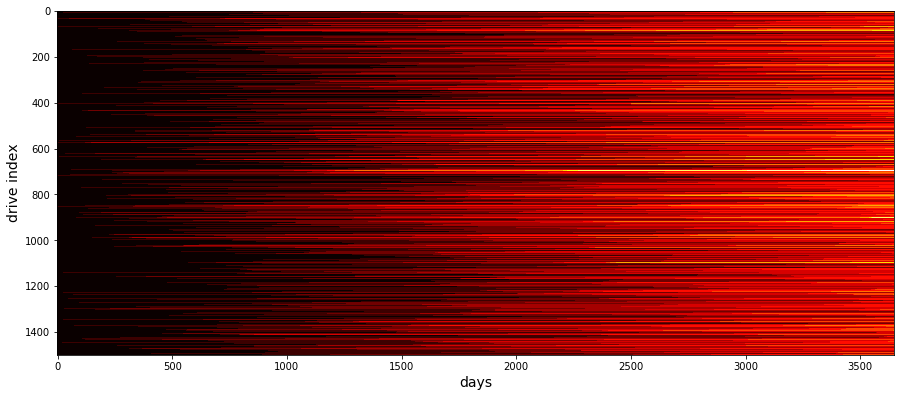

In [7]:
plt.figure(figsize=(15,8))
plt.imshow(ary, cmap='hot', interpolation='nearest');
plt.xlabel('days',fontsize=14)
plt.ylabel('drive index',fontsize=14);

Re-run this simulation to get a distribution of outcomes

In [8]:
list_of_drive_counts = []
for indx in range(100):
    ary = create_ary(number_of_drives,lifespan_in_days)
    list_of_drive_counts.append(sum(ary[:,-1]))

elapsed: 5.04577374458313 seconds
elapsed: 5.050820589065552 seconds
elapsed: 5.154571533203125 seconds
elapsed: 5.261159181594849 seconds
elapsed: 5.318852424621582 seconds
elapsed: 5.2335264682769775 seconds
elapsed: 5.222853183746338 seconds
elapsed: 5.116400718688965 seconds
elapsed: 5.156287431716919 seconds
elapsed: 5.237210750579834 seconds
elapsed: 5.252328634262085 seconds
elapsed: 5.211637735366821 seconds
elapsed: 5.237936496734619 seconds
elapsed: 5.267507791519165 seconds
elapsed: 5.27951717376709 seconds
elapsed: 5.208266258239746 seconds
elapsed: 5.252132177352905 seconds
elapsed: 5.230208396911621 seconds
elapsed: 5.198857069015503 seconds
elapsed: 5.138091802597046 seconds
elapsed: 5.146061420440674 seconds
elapsed: 5.130908250808716 seconds
elapsed: 5.12840461730957 seconds
elapsed: 5.163543701171875 seconds
elapsed: 5.162506580352783 seconds
elapsed: 5.08320426940918 seconds
elapsed: 5.118050813674927 seconds
elapsed: 5.143949508666992 seconds
elapsed: 5.119701147079

show the spread on number of drives

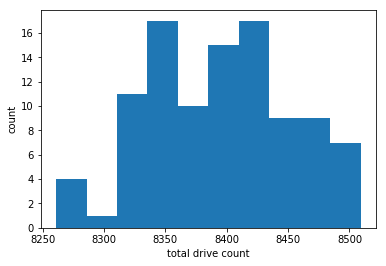

In [9]:
plt.hist(list_of_drive_counts,bins=10)
plt.xlabel('total drive count')
plt.ylabel('count');